# Math Polar Coordinates | Niklas Abraham | 09.07.2021

This following document is used to explain the polar coordinates system for a maths presentation.

Performing the imports for the code.

In [421]:
import os
import math
import datetime
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

### Simple plots examples 

A simple function groupd used to converts the to the diffrent types of systems.

In [422]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

A simple function show how the polar coordinates are displayed.

In [416]:
def single_point(phi, r, scale=1.25):
    # this function will plot single point with all the explanition nessary
    # calculating the relavant data points
    x_d,y_d = pol2cart(r, phi)
    print("Coordinates: "+str(x_d)+" || "+str(y_d))    
    
    # the rest is just plotting

    fig, ax = plt.subplots(figsize=(10, 10))
    fig.patch.set_facecolor('w')
    
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -5, 5, -5, 5
    ticks_frequency = 1
    
    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    
    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    
    
    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
    # plotting the point to origin line
    ax.plot([0,x_d], [0,y_d], c='r', alpha=0.25, linewidth=3)
    
    # plotting the angle between the x-axis and point line    
    m1, b1 = 0,  0 # slope & intercept (line 1)
    m2, b2 = y_d/x_d, 0 # slope & intercept (line 2)

    x0 = (b2-b1) / (m1-m2)
    y0 = m1 * x0 + b1

    theta = np.linspace(0, 2*np.pi, 100)

    r = np.sqrt(4.0) # circle radius

    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0

    x_list = []
    y_list = []

    def line_and_circle_intersection_points(m,b,x0,y0,r):

        c1 = 1 + m ** 2
        c2 = - 2.0 * x0 + 2 * m * ( b - y0 )
        c3 = x0 ** 2 + ( b - y0 ) ** 2 - r ** 2

        # solve the quadratic equation:

        delta = c2 ** 2 - 4.0 * c1 * c3

        x1 = ( - c2 + np.sqrt(delta) ) / ( 2.0 * c1 )
        x2 = ( - c2 - np.sqrt(delta) ) / ( 2.0 * c1 )

        x_list.append(x1)
        x_list.append(x2)

        y1 = m * x1 + b
        y2 = m * x2 + b

        y_list.append(y1)
        y_list.append(y2)

        return None

    line_and_circle_intersection_points(m1,b1,x0,y0,r)
    line_and_circle_intersection_points(m2,b2,x0,y0,r)

    def get_point_angle(x,y,x0,y0):

        num = x - x0
        den = np.sqrt( ( x - x0 )**2 + ( y - y0 )**2 )

        theta = np.arccos( num / den )

        if not y - y0 >= 0: theta = 2 * np.pi - theta

        #print(theta, np.rad2deg(theta), y - y0 )

        return theta

    theta_list = []

    for i in range(len(x_list)):

        x = x_list[i]
        y = y_list[i]

        theta_list.append( get_point_angle(x,y,x0,y0) )

    theta_1 = theta_list[0]
    theta_2 = theta_list[2 if x_d > 0 else 3]

    theta = np.linspace(theta_1, theta_2, 100)

    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0

    ax.plot(x1, x2, color='gray', linewidth=3, alpha=0.4)

    mid_angle = ( theta_1 + theta_2 ) / 2.0

    mid_angle_x = (r+0.45) * np.cos(mid_angle) + x0
    mid_angle_y = (r+0.45) * np.sin(mid_angle) + y0

    angle_value = round( np.rad2deg(abs(theta_1-theta_2)), 2)

    plt.text(mid_angle_x, mid_angle_y, str(angle_value)+"°", fontsize=15)
    
    # plotting the data point
    ax.scatter(x_d,y_d, c='r', linewidth=3)

    
    plt.grid(True)
    fig.savefig('whatever.png', facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()

Coordinates: 3.5355339059327378 || 3.5355339059327373


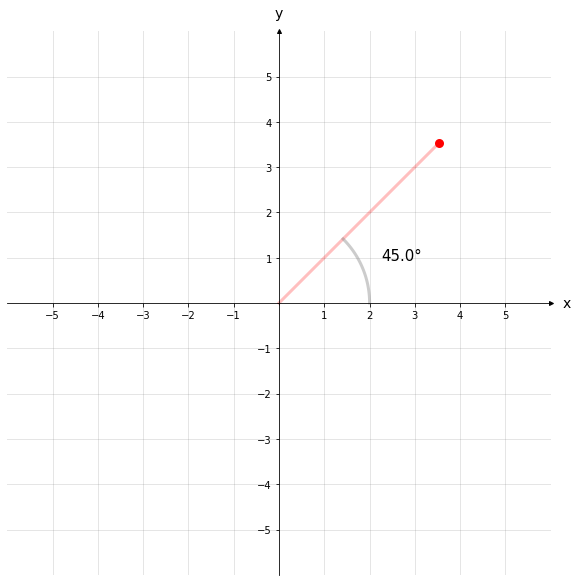

In [419]:
single_point(math.pi/4, 5)

In [273]:
# %matplotlib inline

In [423]:
class Function:
    def __init__(self, phi, R, p, omega):
        #print("Creating a new function for polar coordinates")
        self.phi = phi
        self.R = R
        self.p = p
        self.omega = omega
        
    def cal_x_y_coordinates(self, phi, R, p):
        # calculating the values of x and y
        # checking with the omega if movement
        if self.omega is None:
            x = math.cos(phi) * R + p[0]
            y = math.sin(phi) * R + p[1]
        else:
            x = math.cos(phi * self.omega) * R + p[0]
            y = math.sin(phi * self.omega) * R + p[1]
        return x,y

In [432]:
class System:
    def __init__(self):
        self.functions = []
        
    def add_function(self, f):
        self.functions.append(f)
        
    def cal_point(self, phi, R):
        #
        x,y = 0,0
        
        if R is None:
            for f in self.functions:
                x_f, y_f = f.cal_x_y_coordinates(phi, f.R, f.p)
                x += x_f
                y += y_f
                
        return np.array([x,y])
    
    def plot_range(self, phi, R, n):
        #
        if R is None:
            range_phi = np.linspace(phi[0], phi[1], num=n)
            data = [self.cal_point(phi, R) for phi in range_phi]
            
            return np.array(data)
        
        
    def plot_images_range(self, steps, time_range, folder=None, single_levers=True, R=None, scale=1.25, path_line=True):
        # this function is plotting the images in a special folder
        if (len(self.functions) < 1):
            print(' ------- No functions to simulate ------------')
            return None
        
        if not os.path.isdir('images_math'):
            os.makedirs('images_math')
        self.newpath = 'images_math/'+str(datetime.datetime.now().strftime("%d_%m_%Y__%H_%M_%S"))
        os.makedirs(self.newpath)
        
        steps_array = np.linspace(time_range[0],time_range[1], num = steps)

        for i in range(0, len(steps_array)):
            if R is None:
                data_point = self.cal_point(steps_array[i], R)

                fig, ax = plt.subplots(figsize=(10, 10))
                fig.patch.set_facecolor('w')

                max_p = sum([f.R for f in self.functions])

                if single_levers:
                    start_p = [0,0]
                    for f in self.functions:
                        x_f, y_f = f.cal_x_y_coordinates(steps_array[i], f.R, start_p)
                        ax.plot([start_p[0],x_f], [start_p[1],y_f], linewidth='3')
                        start_p = [x_f,y_f]
                
                if path_line:
                    range_phi = np.linspace(time_range[0], steps_array[i], num=500)
                    data = np.array([self.cal_point(phi, R) for phi in range_phi])
                    ax.plot(data[:,0], data[:,1], c='r', alpha=0.3, linewidth=2)
                    

                ax.set_xlim(max_p*scale, max_p*scale*-1)
                ax.set_ylim(max_p*scale, max_p*scale*-1)
                plt.grid(True)
                ax.scatter(data_point[0], data_point[1], c='r', linewidth=5)
                fig.savefig(self.newpath+'/'+str(i)+'.png', facecolor=fig.get_facecolor(), edgecolor='none')
                plt.close()
                plt.clf()
        

    def plot_single_point(self, phi, R, scale=1.25, single_levers=True):
        # plotting a single point
        # only phi and R is None        
        
        if R is None:
            data_point = self.cal_point(phi, R)

            # plt.xlim(data_point[0]*scale, data_point[0]*scale*-1)
            # plt.ylim(data_point[1]*scale, data_point[1]*scale*-1)
            max_p = sum([f.R for f in self.functions])

            if single_levers:
                start_p = [0,0]
                for f in self.functions:
                    x_f, y_f = f.cal_x_y_coordinates(phi, f.R, start_p)
                    plt.plot([start_p[0],x_f], [start_p[1],y_f])
                    start_p = [x_f,y_f]
            
            plt.xlim(max_p*scale, max_p*scale*-1)
            plt.ylim(max_p*scale, max_p*scale*-1)
            plt.grid(True)
            plt.scatter(data_point[0], data_point[1], c='r')
        
        plt.show()

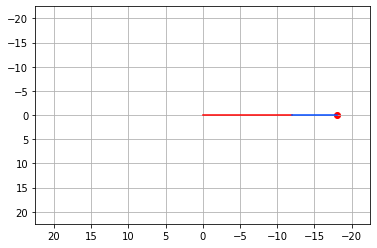

<Figure size 432x288 with 0 Axes>

In [434]:
test_point = System()

f = Function(0,12,np.array([0,0]), (2*math.pi)/365)
g = Function(0,6,np.array([0,0]), (2*math.pi)/30)
# h = Function(0,3,np.array([0,0]), (18*math.pi))

test_point.add_function(f)
test_point.add_function(g)
# test_point.add_function(h)

test_point.plot_single_point(2.5, None)

test_point.plot_images_range(200, [0,5])

Single test

In [426]:
f = Function(0,3,np.array([0,0]), 2*math.pi)
g = Function(0,8,np.array([0,0]), (2*math.pi)/5)

In [427]:
s = System()
s.add_function(f)
s.add_function(g)

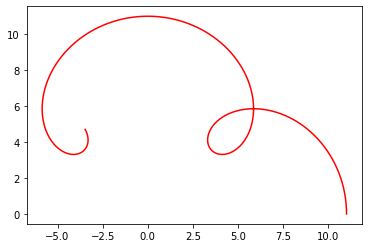

In [428]:
data = s.plot_range([0,2], None, 200)
plt.plot(data[:,0], data[:,1], c='r')